In [11]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
#读取
train_ = pd.read_csv(r'D:\\BaiduNetdiskDownload\\Data\\二手车\\train_.csv')
test_ = pd.read_csv(r'D:\\BaiduNetdiskDownload\\Data\\二手车\\test_.csv')
if train_.columns[0] == 'Unnamed: 0':
    train_ = train_.drop(columns='Unnamed: 0')
if test_.columns[0] == 'Unnamed: 0':
    test_ = test_.drop(columns='Unnamed: 0')


In [5]:
train_.head()

,SaleID,name,model,power,kilometer,regionCode,price,v_0,v_1,v_2,...,fuelType_1,fuelType_2,fuelType_3,fuelType_4,fuelType_5,fuelType_6,gearbox_0,gearbox_1,notRepairedDamage_0,notRepairedDamage_1
0,0,736,30,60.0,12.5,1046,1850,43.357796,3.966344,0.050257,...,0,0,0,0,0,0,1,0,1,0
1,1,2262,40,0.0,15.0,4366,3600,45.305273,5.236112,0.137925,...,0,0,0,0,0,0,1,0,1,0
2,2,14874,115,163.0,12.5,2806,6222,45.978359,4.823792,1.319524,...,0,0,0,0,0,0,1,0,1,0
3,3,71865,109,193.0,15.0,434,2400,45.687478,4.492574,-0.050616,...,0,0,0,0,0,0,0,1,1,0
4,4,111080,110,68.0,5.0,6977,5200,44.383511,2.031433,0.572169,...,0,0,0,0,0,0,1,0,1,0


In [6]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 87 columns):
SaleID                 150000 non-null int64
name                   150000 non-null int64
model                  150000 non-null int64
power                  150000 non-null float64
kilometer              150000 non-null float64
regionCode             150000 non-null int64
price                  150000 non-null int64
v_0                    150000 non-null float64
v_1                    150000 non-null float64
v_2                    150000 non-null float64
v_3                    150000 non-null float64
v_4                    150000 non-null float64
v_5                    150000 non-null float64
v_6                    150000 non-null float64
v_7                    150000 non-null float64
v_8                    150000 non-null float64
v_9                    150000 non-null float64
v_10                   150000 non-null float64
v_11                   150000 non-null float64
v_12  

In [7]:
corr = pd.DataFrame(train_.corr()['price'].T)
feature = [ 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
           'v_10', 'v_11', 'v_12', 'v_13', 'v_14','price','power','kilometer']
pd.DataFrame(abs(train_[feature].corr()['price'])).sort_values('price',ascending=False)

,price
price,1.000000
v_3,0.730946
v_12,0.692823
v_8,0.685798
v_0,0.628397
power,0.569026
kilometer,0.440519
v_11,0.275320
v_10,0.246175
v_9,0.206205


In [8]:
train_[feature].describe()

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price,power,kilometer
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688,5923.327333,116.419889,12.597160
std,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685,7501.998477,68.552840,3.919576
min,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556,11.000000,0.000000,0.500000
25%,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034,1300.000000,75.000000,12.500000
50%,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246,3250.000000,110.000000,15.000000
75%,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378,7700.000000,150.000000,15.000000
max,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418,99999.000000,600.000000,15.000000


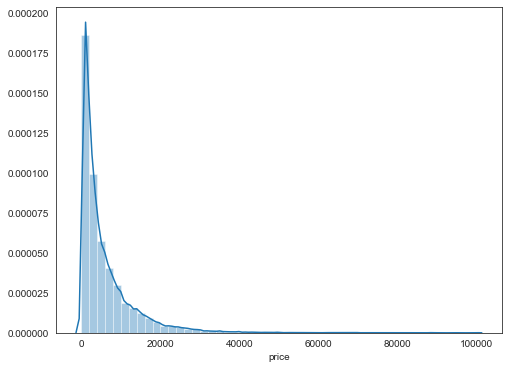

In [12]:
# 目标值分布，右偏分布
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("white")
sns.distplot(train_['price'])

In [15]:
# 查看分类特征的类别数量
for i in ['name', 'model', 'regionCode']:
    print(i, train_[i].nunique())

name 99662
model 248
regionCode 7905
